# Task 1

----------

### Web Scraping:

We utilized the BeautifulSoup package to extract information from [https://www.airlinequality.com].
We focused on retrieving reviews specific to British Airways from the URL [https://www.airlinequality.com/airline-reviews/british-airways].
We iterated through multiple pages, collecting textual content from each review using the requests and BeautifulSoup libraries.
The reviews were stored in a DataFrame for further analysis.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Set up base URL and parameters
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100
reviews = []

# Iterate through pages and scrape reviews
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
print(f" --> {len(reviews)} total reviews")

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50
 --> 3624 total reviews


In [3]:
# Creating a DataFrame to store reviews
df = pd.DataFrame(reviews, columns=["Reviews"])
df

,Reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...
...,...
3619,This was a bmi Regional operated flight on a R...
3620,LHR to HAM. Purser addresses all club passenge...
3621,My son who had worked for British Airways urge...
3622,London City-New York JFK via Shannon on A318 b...


In [4]:
df.Reviews= df.Reviews.str.split('|',expand=True)[1]
df.head(10)

,Reviews
0,Easy check in a T5. Galleries south and Nort...
1,"Flight delayed by an hour, it happens, no bi..."
2,The staff are very rude and not trained prope...
3,Good domestic flight operated by BA Cityflye...
4,Failed at all basic travel fundamentals: 1) O...
5,They lost my baggage in a very simple situat...
6,Late boarding led to a one hour flight leavi...
7,As usual the flight is delayed. BA try to bla...
8,I had the most fantastic BA Flight today. Th...
9,Couldn’t book in online. Arrived at check in...


**Rule-based methodology:**

The rule-based approach presents a pragmatic method for text analysis that circumvents the need for model training or the utilization of machine learning algorithms. The outcome of this approach materializes in the form of a set of predetermined rules, which serve as the basis for categorizing text into positive, negative, or neutral sentiments. These predefined rules are often referred to as lexicons, thereby giving rise to the nomenclature "Lexicon-based approach."

Prominently employed lexicon-based methodologies encompass TextBlob, VADER, and SentiWordNet.

__Steps for Preprocessing Data:__

1. Text Cleansing
2. Tokenization
3. Augmentation through Part-of-Speech (POS) Tagging
4. Elimination of Stopwords
5. Extraction of Stem Words

### Step 1. Text Preprocessing:

We started by cleaning the text, removing non-alphabetic characters and special symbols, ensuring only textual content remained.
Tokenization was performed using NLTK's word_tokenize function, breaking down reviews into individual words.
Part-of-Speech (POS) tagging was used to augment the data, identifying the grammatical parts of words.
Stopwords (common, non-meaningful words) were removed to refine the dataset.
Lemmatization was applied to transform words into their base or root form, reducing inflected words to a common form.

In [5]:
# Cleaning the text
def clean_text(text):
    cleaned_text = re.sub('[^A-Za-z]+', ' ', str(text))
    return cleaned_text

df['Cleaned_Reviews'] = df['Reviews'].apply(clean_text)
df

,Reviews,Cleaned_Reviews
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...
...,...,...
3619,None,None
3620,None,None
3621,None,None
3622,None,None


### Step 2: Tokenization
Tokenization involves breaking down the text into smaller units known as tokens. These tokens can be formed either at the sentence level (sentence tokenization) or at the word level (word tokenization).

In [6]:
# Tokenization and POS tagging
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

def preprocess_text(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    cleaned_tags = [(word, pos_dict.get(tag[0])) for word, tag in pos_tags if word.lower() not in set(stopwords.words('english'))]
    return cleaned_tags

pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}
df['POS_Tagged'] = df['Cleaned_Reviews'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Reviews,Cleaned_Reviews,POS_Tagged
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south..."
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen..."
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl..."
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera..."
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam..."


### Step 3: Augmentation through Part-of-Speech (POS) Tagging
Parts of Speech (POS) tagging enhances the text by assigning each token a tag in the format (word, tag). POS tagging is crucial to maintaining the context of each word and is particularly important for Lemmatization.

### Step 4: Elimination of Stopwords
Stopwords are commonly used words in a language that contribute minimal meaningful information. Removing these stopwords is an essential part of text preprocessing. NLTK provides a predefined list of stopwords for various languages.

### Step 5: Extraction of Stem Words
Stem words represent the core lexical meaning of a word. There are two primary techniques for obtaining stem words: Stemming and Lemmatization. While Stemming can produce truncated and sometimes nonsensical root words, Lemmatization yields meaningful root words. Lemmatization, however, requires the use of POS tags for accurate results.

### ***NLTK and Its Role*** 
NLTK (Natural Language Toolkit) is a comprehensive toolkit for developing Python programs to work with human language data. It offers user-friendly interfaces to over 50 corpora and lexical resources, such as WordNet. Additionally, NLTK provides a suite of text processing libraries for various tasks, including classification, tokenization, stemming, tagging, parsing, and semantic reasoning. It also serves as a wrapper for powerful NLP libraries used in real-world applications.

In [7]:
# Lemmatization
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_data(pos_data):
    lemmatized_text = " ".join([wordnet_lemmatizer.lemmatize(word, pos=pos) if pos else word for word, pos in pos_data])
    return lemmatized_text

df['Lemmatized'] = df['POS_Tagged'].apply(lemmatize_data)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Reviews,Cleaned_Reviews,POS_Tagged,Lemmatized
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack a...
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change gate...
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make child...
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Grou...
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay S...


### Sentiment Analysis:

We used the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool to calculate sentiment scores for each review.
Sentiment scores were categorized into positive, negative, or neutral sentiments based on predefined rules.
The sentiment analysis results were added to the DataFrame.

In [8]:
# Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(review):
    sentiment_scores = analyzer.polarity_scores(review)
    return sentiment_scores['compound']

df['Sentiment_Score'] = df['Lemmatized'].apply(analyze_sentiment)

def categorize_sentiment(score):
    if score >= 0.5:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment_Score'].apply(categorize_sentiment)
df.head()

,Reviews,Cleaned_Reviews,POS_Tagged,Lemmatized,Sentiment_Score,Sentiment
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack a...,0.9415,Positive
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change gate...,-0.2235,Negative
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make child...,-0.7698,Negative
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Grou...,0.9420,Positive
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay S...,-0.9019,Negative


In [9]:
Count = df['Sentiment'].value_counts()
Count

Sentiment
Neutral     1756
Positive    1093
Negative     775
Name: count, dtype: int64

### Visualization:

Sentiment distribution was visualized using a pie chart to show the proportion of positive, negative, and neutral reviews.
A word cloud was generated to display the most frequent terms in the lemmatized reviews, providing a visual summary of the overall sentiment.

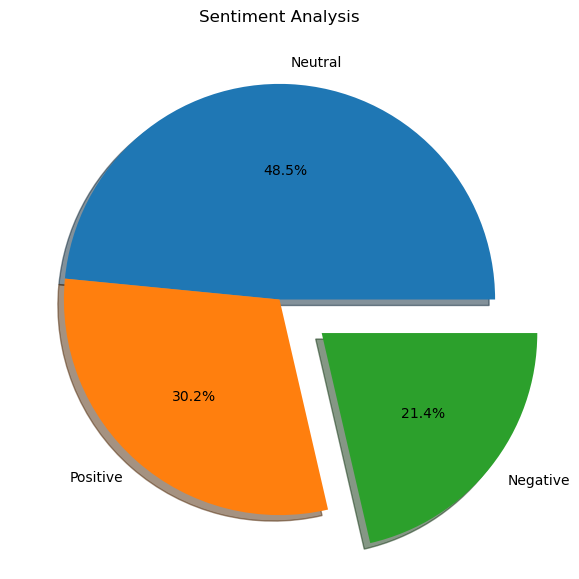

In [10]:
# Visualizing sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(15, 7))
plt.title("Sentiment Analysis")
plt.pie(sentiment_counts.values, labels=sentiment_counts.index,explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=True)
plt.show()

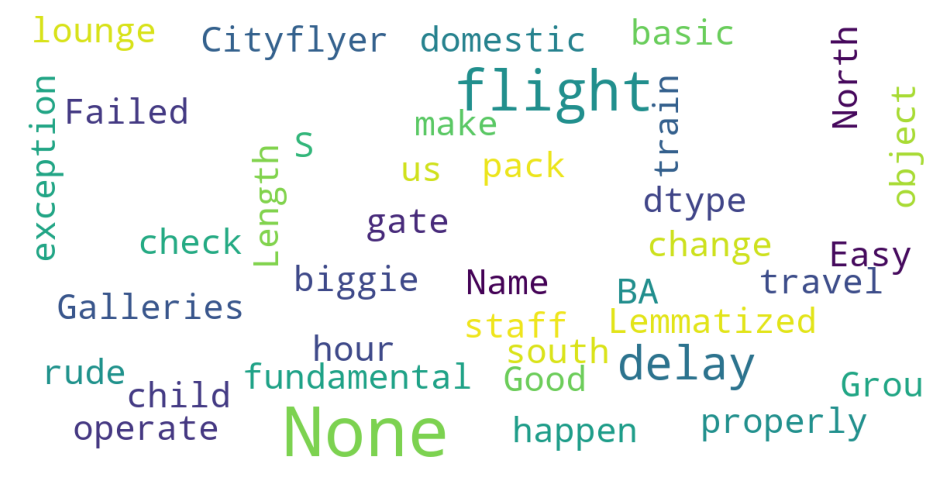

In [11]:
# Generating and displaying Word Cloud
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    )
    wordcloud = wordcloud.generate(str(data))
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Lemmatized'])

In [12]:
import os
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

C:\Users\manoj\anaconda3\Lib\site-packages\botocore\utils.py:15: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
C:\Users\manoj\anaconda3\Lib\site-packages\botocore\httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


In [13]:
tokenized_texts =[text.split() for text in df['Lemmatized']] # Tokenize the text
id2word = Dictionary(tokenized_texts) # Create a dictionary from the tokenized texts
corpus = [id2word.doc2bow(text) for text in tokenized_texts] # Create a corpus from the tokenized texts

In [14]:
num_topics = 10  # Number of topics to be extracted

In [15]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes = 10) # Train the LDA model

In [16]:
topics = lda_model.print_topics(num_topics = num_topics, num_words = 10) # Print the topics
for topic in topics:
    print(topic)

(0, '0.044*"seat" + 0.016*"BA" + 0.012*"class" + 0.011*"business" + 0.009*"get" + 0.008*"check" + 0.007*"flight" + 0.007*"passenger" + 0.007*"meal" + 0.006*"economy"')
(1, '0.008*"service" + 0.005*"BA" + 0.005*"new" + 0.005*"fast" + 0.005*"Toronto" + 0.005*"Fast" + 0.004*"customer" + 0.003*"Club" + 0.003*"menu" + 0.003*"food"')
(2, '0.023*"flight" + 0.017*"BA" + 0.011*"time" + 0.010*"crew" + 0.010*"staff" + 0.008*"check" + 0.007*"minute" + 0.007*"would" + 0.007*"passenger" + 0.007*"us"')
(3, '0.021*"bag" + 0.019*"BA" + 0.012*"check" + 0.011*"seat" + 0.006*"luggage" + 0.006*"baggage" + 0.006*"plane" + 0.005*"get" + 0.005*"flight" + 0.005*"overhead"')
(4, '0.023*"flight" + 0.019*"BA" + 0.015*"service" + 0.014*"London" + 0.013*"airline" + 0.013*"British" + 0.013*"Airways" + 0.012*"food" + 0.012*"seat" + 0.011*"fly"')
(5, '0.607*"None" + 0.001*"hardware" + 0.001*"disregard" + 0.001*"Uni" + 0.001*"Always" + 0.001*"Wrong" + 0.001*"Madeira" + 0.001*"TAP" + 0.001*"rudeness" + 0.001*"settle"')


In [17]:
# Define the file path for saving the pyLDAvis data
LDAvis_data_filepath = 'path_to_save_LDAvis_data.pkl'  # You need to specify the actual file path

# Prepare and save the pyLDAvis data (only if it hasn't been prepared before)
if 1 == 1:  # Change this condition to suit your needs
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, n_jobs = 1)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

# Save the pyLDAvis visualization as an HTML file
output_html_filepath = 'path_to_save_LDAvis_visualization.html'  # You need to specify the actual file path
pyLDAvis.save_html(LDAvis_prepared, output_html_filepath)

In [18]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.138179 -0.026548       1        1  23.607870
7      0.152417  0.183078       2        1  23.448808
4      0.142048 -0.035123       3        1  21.638175
2      0.108761  0.040352       4        1  13.606222
0      0.096907 -0.001827       5        1   8.627833
8      0.051683 -0.168835       6        1   4.809531
3     -0.041032  0.038443       7        1   1.738717
1     -0.135524 -0.066593       8        1   0.949531
6     -0.149833 -0.040733       9        1   0.812049
5     -0.363606  0.077785      10        1   0.761265, topic_info=          Term         Freq        Total Category  logprob  loglift
3019      None   829.000000   829.000000  Default  30.0000  30.0000
42        seat  2193.000000  2193.000000  Default  29.0000  29.0000
102         BA  2814.000000  2814.000000  Default  28.0000  28.0000
63         bag   510.000000   510.000

### Conclusion:
In this project, we successfully scraped British Airways reviews from Skytrax, performed text preprocessing including cleaning, tokenization, POS tagging, and lemmatization. We conducted sentiment analysis using VADER, categorized sentiments, and visualized the sentiment distribution and frequent terms using charts and word clouds. The analysis provides insights into the sentiment of British Airways reviews, which can be used for understanding customer opinions, identifying areas for improvement, and making informed business decisions.

---